<h1><b>Ο αλγόριθμος Logistic Regression</b></h1>
<p align="justify">Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο <i>logistic regression</i>, κατασκευάζοντας ένα σύντομο πρόγραμμα. Στην άσκηση αυτή θα χρησιμοποιήσετε τη βιβλιοθήκη της <i>Python Scikit-Learn</i>. Για τη διευκόλυνσή σας παρέχονται οι δηλώσεις των βιβλιοθηκών που θα χρησιμοποιήσετε καθώς και εντολές με κενά. Συγκεκριμένα, θα κατασκευάσετε έναν <i>ταξινομητή Spam μηνυμάτων SMS</i>. Τα δεδομένα που θα χρησιμοποιήσετε για την εκπαίδευση και την επικύρωση του μοντέλου, καθώς και πληροφορίες για αυτά μπορούν να βρεθούν <a href="https://archive.ics.uci.edu/ml/datasets/sms+spam+collection"><i>εδώ</i></a>.</p>
<p align="justify">Καλείστε να αναπτύξετε ένα πρόγραμμα, το οποίο:</p>
<ul>
<li>Θα φορτώνει τα δεδομένα από το αρχείο <i>.csv</i>.</li>
<li>Θα διαχωρίζει με τυχαίο τρόπο τα δεδομένα που παρέχονται σε δεδομένα εκπαίδευσης <i>(training set)</i> και δεδομένα για τον υπολογισμό της ακρίβειας του μοντέλου <i>(test set)</i>.</li>
<li>Θα πραγματοποιεί προεπεξεργασία στα δεδομένα χρησιμοποιώντας τη μέθοδο <i>TfidVectorizer</i> της βιβλιοθήκης <i>Scikit-Learn</i>. Περισσότερες πληροφορίες για τη μέθοδο <i>TfidVectorizer</i>, που περιλαμβάνεται στις δηλώσεις του προγράμματος, μπορούν να βρεθούν <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html"><i>εδώ</i></a>. Να σημειωθεί πως η μέθοδος <i>TfidVectorizer</i> της <i>Scikit-Learn</i> αφαιρεί και τα σημεία στίξης, καθώς επεξεργάζεται το dataset.</li>
<li>Θα εκπαιδεύει το μοντέλο <i>logistic regression</i>.
<li>Θα υπολογίζει την ακρίβειά του πάνω στο <i>test set</i>.</li>
</ul>
<p align="justify">Για ποιους λόγους πιστεύετε ότι δεν είναι κατάλληλη η εφαρμογή της μεθόδου <i>linear regression</i> στο συγκεκριμένο πρόβλημα;</p>

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt 

In [2]:
# load csv file
df  = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv')
df= df[['v1','v2']]

# Renaming the columns 
df.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
print(df.head())

df['Num_Target']=df.Target.map({'ham':0, 'spam':1})

  Target                                               Text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
# split dataset
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['Text'].values,df['Num_Target'].values, test_size=0.33, random_state=42)


In [4]:
# vectorize data
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train_raw)
X_test =  vectorizer.fit_transform(X_test_raw)
#vectorizer.get_feature_names()

print('Shapes of the Data:\nTrain:{}\nTest: {} '.format(X_train.shape, X_test.shape))

Shapes of the Data:
Train:(3733, 6757)
Test: (1839, 4447) 


In [5]:
# fit Logistic Regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# calculate accurary based on test set -  Cross Validation
cv_scores = cross_val_score(classifier, X_test, y_test, cv=5)
acc = cv_scores.mean()
print("Accuracy on the Test Set: {}%".format(acc *100))

Accuracy on the Test Set: 90.10292027011018%


Linear regression  looks at a relationship between the mean of the dependent variables and the independent variables. Just as the mean is not a complete description of a single variable, linear regression is not a complete description of relationships among variables. From the length-messages figure we can observe that the ham messages are in general of very limited length in comparison with the spam messages. There are very few ham messages of size close to the mean of the spam messages. The proportion of the length of the ham data that is bigger or equal to the length of the spam length is ~11%. This could be an explanation for the amount of the missing classifications, almost 10% of the data were misclassified. 

Amount of Ham data with length bigger or equal to the mean length of the spam data:
 11.854922279792746 %


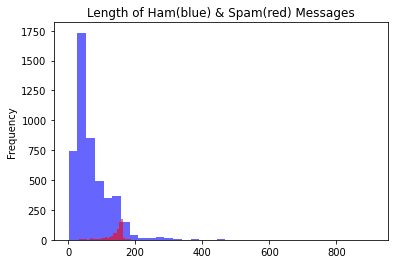

In [6]:
df['message_len'] = df.Text.apply(len)

#Plot Length of the 2 Categories
df[df.Target=='ham'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
df[df.Target=='spam'].message_len.plot(bins=35, kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.title('Length of Ham(blue) & Spam(red) Messages')

Number = np.sum((df[df.Target=='ham'].message_len >=np.mean(df[df.Target=='spam'].message_len))==True)/len(df[df.Target=='ham'].message_len.values) 
print('Amount of Ham data with length bigger or equal to the mean length of the spam data:\n',Number*100, '%')
